In [ ]:
# importamos un extensión para matplotlib
%matplotlib inline

# [Pytorch](https://pytorch.org/)

Para más información [ver](https://pytorch.org/tutorials/beginner/basics/intro.html)

Es un framework para el entrenamiento de modelos de machine learning.

Esta dividido en 3 dominios específicos:
- TorchText para los modelos que manipulan textos.
- TorchVision para los modelos que manipulan imágenes o videos.
- TorchAudio para los modelos que manipulan archivos de audio.

Cada uno de estos dominios incluye Datasets de ejemplos.


## [Instalación](https://pytorch.org/get-started/locally/)

Para la instalación es comendable visitar la página web de instalación donde podemos seleccionar varias opciones de instalación.

Dentro de estas opciones podemos ver el sistema operativo, el sistema de paquetes de instalación de deseamos utilizar, el lenguaje con el cual lo voy a utilizar y en que plataforma, es decir, si poseo placa gráfica (cuda de nvidia, rocm de amd) o cpu.

Según la configuración al final nos muestra la sentencia que debemos ejecutar.

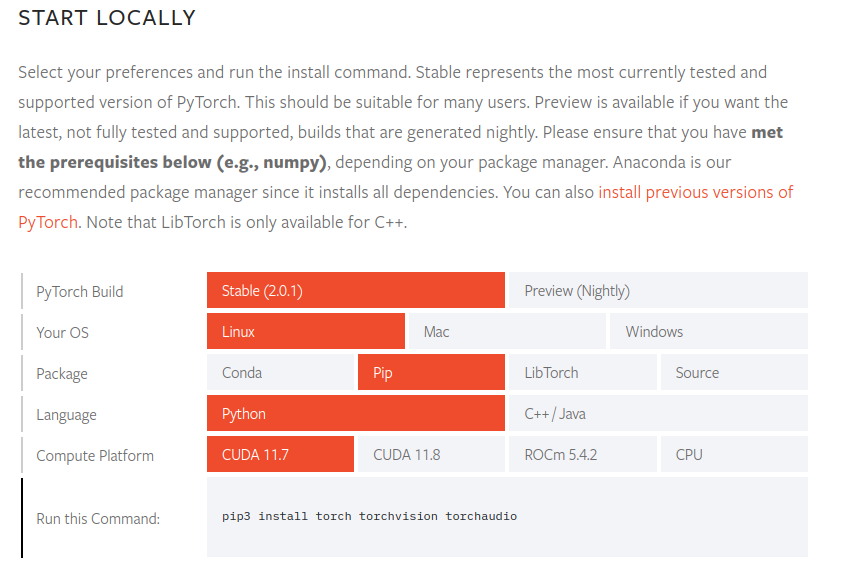

## Verificando la versión

In [ ]:
import torch
torch.__version__

'2.0.1+cu118'

In [ ]:
# import torch
# from torch import nn
# from torch.utils.data import DataLoader
# from torchvision import datasets
# from torchvision.transforms import ToTensor

## [Tensores](https://pytorch.org/docs/stable/tensors.html)

Los tensores tienen una estructura muy similar a los arreglos y matrices.

En pytorch se utilizan como entrada, salida y parámetros de los modelos.

Son similares a los ndarrays (arreglos de numpy), pero con la excepción de que los tensores pueden correr en GPU u otro tipo de hardware similar. Estos toman la base o la idea de numpy.

In [ ]:
import torch
import numpy as np

### Inicializando un Tensor

Pueden ser inicializados de diferentes formas.

In [ ]:
# Inicializamos una matriz con listas
data_list = [[1, 2, 3],[4,5, 6], [7, 8, 9]]
print(f"Matriz de listas: {data_list}")
print()

# Pasamos la lista a un tensor
tensor_data = torch.tensor(data_list)
print(f"Tensor desde una matriz de listas: \n{tensor_data}")
print()

# Pasamos la matriz de listas a un arreglo de numpy
data_numpy = np.array(data_list)
# Pasamos el arreglode numpy a un tensor
tensor_data_numpy = torch.from_numpy(data_numpy)
print(f"Tensor desde un arreglo de numpy: \n{tensor_data_numpy}")
print()

# Copiamos las propiedades del tensor original, o sea, el shape para crear
# un nuevo tensor de unos
tensor_ones = torch.ones_like(tensor_data)
print(f"Tensor de todos unos con la misma forma que el tenso de la matriz de " \
      f"listas: \n {tensor_ones}")
print()

tensor_random = torch.rand_like(tensor_data, dtype=torch.float)
print(f"Tensor de valores aleatorios con la misma forma que el tenso de la matriz de " \
      f"listas: \n {tensor_ones}")
print()

# Copiamos las propiedades del tensor original, o sea, el shape para crear
# un nuevo tensor con valores aleatoreos y un tipo de dato diferente
x_rand = torch.rand_like(tensor_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

shape = (2,3,4)
print(f"La forma de los nuevos tensores es: {shape}")
print(f"Tensor random a partir de la forma: \n {torch.rand(shape)} \n")
print(f"Tensor de 0 a partir de la forma: \n {torch.ones(shape)} \n")
print(f"Tensor de 1 a partir de la forma: \n {torch.zeros(shape)} \n")


Matriz de listas: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

Tensor desde una matriz de listas: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Tensor desde un arreglo de numpy: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Tensor de todos unos con la misma forma que el tenso de la matriz de listas: 
 tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

Tensor de valores aleatorios con la misma forma que el tenso de la matriz de listas: 
 tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])

Random Tensor: 
 tensor([[0.8866, 0.8745, 0.1333],
        [0.3238, 0.5012, 0.2325],
        [0.6005, 0.3760, 0.3088]]) 

La forma de los nuevos tensores es: (2, 3, 4)
Tensor random a partir de la forma: 
 tensor([[[0.3566, 0.4714, 0.4919, 0.3876],
         [0.8077, 0.3083, 0.5999, 0.1089],
         [0.1392, 0.2947, 0.5379, 0.3823]],

        [[0.2572, 0.4049, 0.8630, 0.6977],
         [0.3228, 0.3688, 0.7450, 0.7313],
         [0.8557, 0.6678, 0.0535, 0.5600]]]) 

Tens


### Atributos del Tensor

El tensor tiene los siguientes atributos:
- shape: forma
- dtype: tipo de dato
- device: dispositivo donde se encuentra



In [ ]:
tensor = torch.rand(3,4)

print(f"shape: {tensor.shape}")
print(f"dtype: {tensor.dtype}")
print(f"device: {tensor.device}")

shape: torch.Size([3, 4])
dtype: torch.float32
device: cpu


### [Operaciones con Tensores](https://pytorch.org/docs/stable/torch.html)

Existen más de 100 operaciones disponibles incluidas aritméticas,  álgebra lineal, manipulación de matrice, etc.

Cada una de estas operaciones pueden correr en cualquier dispositivo, para cambiar el dispositivo pueden ir a Runtime > Change runtime type > GPU.

Por defecto se crean para ser utilizados en CPU pero lo podemos mover utilizando el método `.to`, antes de moverlo debemos verificar que el dispositivo de destino este disponible.

In [ ]:
# Movemos el Tensor a la GPU si esta disponible
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
# Clonamosel tensor
tensor_copy = tensor.clone()
# Mostramos el tensor clonado, ver que en la clave device aparece 'cuda:0',
# eso quiere decir que se encuentra en la gpu
print(tensor_copy)
# Mostramos el tensor que enviamos al cpu, en este caso NO se muestra la
# clave device
print(tensor_copy.to("cpu"))

tensor([[0.4526, 0.5588, 0.0872, 0.5586],
        [0.8351, 0.4116, 0.2553, 0.3066],
        [0.1738, 0.9976, 0.0106, 0.8430]])
tensor([[0.4526, 0.5588, 0.0872, 0.5586],
        [0.8351, 0.4116, 0.2553, 0.3066],
        [0.1738, 0.9976, 0.0106, 0.8430]])


- [cat](https://pytorch.org/docs/stable/generated/torch.cat.html)
- [stack](https://pytorch.org/docs/stable/generated/torch.stack.html)



In [ ]:
# Realizamos una copia del tensor original
tensor_copy = tensor_data.clone()
print(f"EL tensor que utilizaremos es: \n{tensor_copy}")
print()
print(f"Sentencia: tensor_copy[0]")
print(f"Primera fila: {tensor_copy[0]}")
print()
print(f"Sentencia: tensor_copy[:, 0]")
print(f"Primera columna: {tensor_copy[:, 0]}")
print()
print(f"Sentencia: tensor_copy[..., -1]")
print(f"última columna: {tensor_copy[..., -1]}")

# cambiamos los valores de la segunda columna.
print()
tensor_copy[:,1] = 0
print(f"Sentencia: tensor_copy[:,1] = 0")
print(f"El nuevo tensor después de modificar la segunda columna: \n{tensor_copy}")

# Concatenación de tensores
print()
# Pone un Tensor debajo del otro
print(f"Sentencia: torch.cat([tensor_data, tensor_data], dim=0)")
print(f"Concatenamos un tensor por filas con cat: \n{torch.cat([tensor_data, tensor_data], dim=0)}")
print()
# Pone un Tensor al lado del otro
print(f"Sentencia: torch.cat([tensor_data, tensor_data], dim=1)")
print(f"Concatenamos un tensor por columnas con cat: \n{torch.cat([tensor_data, tensor_data], dim=1)}")

# Concatenación de tensores por stack
print()
# Pone un Tensor debajo del otro
print(f"Sentencia: torch.stack([tensor_data, tensor_data], dim=0)")
print(f"Concatenamos un tensor por filas con stack: \n{torch.stack([tensor_data, tensor_data], dim=0)}")
print()
# Pone un Tensor al lado del otro
print(f"Sentencia: torch.stack([tensor_data, tensor_data], dim=1)")
print(f"Concatenamos un tensor por columnas con stack: \n{torch.stack([tensor_data, tensor_data], dim=1)}")


# Transpuesta de una matriz
print()
print(f"Sentenica: tensor_data.T")
print(f"Transpueta: \n{tensor_data.T}")

# Multiplicación de matrices
print()
print(f"Sentencia: tensor_data @ tensor_data.T")
print(f"Multiplicación de matrices: \n{tensor_data @ tensor_data.T}")
print()
print(f"Sentencia: tensor_data.matmul(tensor_data.T)")
print(f"Multiplicación de matrices: \n{tensor_data.matmul(tensor_data.T)}")

# Multiplicación de matrices elemento por elemento
print()
print(f"Sentencia: tensor_data * tensor_data")
print(f"Multiplicación de matrices: \n{tensor_data * tensor_data}")
print()
print(f"Sentencia: tensor_data.mul(tensor_data)")
print(f"Multiplicación de matrices: \n{tensor_data.mul(tensor_data)}")

# Agregaciones
print()
print(f"Sentencia: tensor_data.sum()")
print(f"Agregación, suma todos los valores de la matriz: {tensor_data.sum()}")

# Operaciones sobre el mismo tensor contra un valor
# Todas las funciones que terminan con el sufijo de guión bajo '_',
# realizan está operación, por ejemplo, pow_(), add_(), sqrt_()
# EL RESULTADO SE OBTIENE SOBRE EL MISMO VECTOR, ES POR ESE MOTIVO QUE LO COPIO
# DESPUÉS DE CADA OPERACIÓN
print()
tensor_copy = tensor_data.clone()
print(f"Sentencia: tensor_copy.add_(3)")
print(f"Suma el valor 3 a todas las posiciones: \n{tensor_copy.add_(3)}")

print()
tensor_copy = tensor_data.clone()
print(f"Sentencia: tensor_copy.t_()")
print(f"Realiza la transpuesta: \n{tensor_copy.t_()}")

print()
tensor_copy = tensor_data.clone()
print(f"Sentencia: tensor_copy.pow_(2)")
print(f"Realiza la potencia de 2: \n{tensor_copy.pow_(2)}")


EL tensor que utilizaremos es: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Sentencia: tensor_copy[0]
Primera fila: tensor([1, 2, 3])

Sentencia: tensor_copy[:, 0]
Primera columna: tensor([1, 4, 7])

Sentencia: tensor_copy[..., -1]
última columna: tensor([3, 6, 9])

Sentencia: tensor_copy[:,1] = 0
El nuevo tensor después de modificar la segunda columna: 
tensor([[1, 0, 3],
        [4, 0, 6],
        [7, 0, 9]])

Sentencia: torch.cat([tensor_data, tensor_data], dim=0)
Concatenamos un tensor por filas con cat: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Sentencia: torch.cat([tensor_data, tensor_data], dim=1)
Concatenamos un tensor por columnas con cat: 
tensor([[1, 2, 3, 1, 2, 3],
        [4, 5, 6, 4, 5, 6],
        [7, 8, 9, 7, 8, 9]])

Sentencia: torch.stack([tensor_data, tensor_data], dim=0)
Concatenamos un tensor por filas con stack: 
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

 


### Pasar tensor a numpy

Recordar que numpy trabaja en CPU, mientras que los Tensores lo pueden hacer en cualquier dispositivo disponible.

Este pasaje genera una vinculación en memoria, esto quiere decir que si modifico el tensor también se modifica el arreglo de numpy y si modifico el arreglo de numpy también se modifica el tensor.



In [ ]:
# Realizamos una copia del tensor original
tensor_copy = tensor_data.clone()
print(f"EL tensor que utilizaremos es: \n{tensor_copy}")
print()

print(f"Sentencia: tensor_copy.numpy()")
tensor_to_numpy = tensor_copy.numpy()
print("Para esto vamos a generar una variable llamada tensor_to_numpy")
print(f"Pasamos el tensor a numpy: \n{tensor_to_numpy}")

# modificamos el tensor, agregando 3 a todas las posiciones
tensor_copy.add_(3)
print(f"El tensor quedó así: \n{tensor_copy}")
print(f"El arreglo de numpy quedó así: \n{tensor_to_numpy}")

# modificamos el arreglo de numpy
tensor_to_numpy[:,1] = 0
print(f"El arreglo de numpy quedó así: \n{tensor_to_numpy}")
print(f"El tensor quedó así: \n{tensor_copy}")

EL tensor que utilizaremos es: 
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Sentencia: tensor_copy.numpy()
Para esto vamos a generar una variable llamada tensor_to_numpy
Pasamos el tensor a numpy: 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
El tensor quedó así: 
tensor([[ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
El arreglo de numpy quedó así: 
[[ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
El arreglo de numpy quedó así: 
[[ 4  0  6]
 [ 7  0  9]
 [10  0 12]]
El tensor quedó así: 
tensor([[ 4,  0,  6],
        [ 7,  0,  9],
        [10,  0, 12]])


## Datasets & DataLoaders

PyTorch proporciona dos clases para trabajar con los datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset`.

El `Dataset` almacena las muestras y sus correspondientes etiquetas, y el `DataLoader` es un iterador del Dataset que nos facilita facilitar el acceso a las muestras.

PyTorch proporciona algunos Dataset precargados para utilizar de ejemplos, y estos se dividen en:
- [Conjuntos de datos de imágenes](https://pytorch.org/vision/stable/datasets.html)
- [Conjuntos de datos de texto](https://pytorch.org/text/stable/datasets.html)
- [Conjuntos de datos de audio](https://pytorch.org/audio/stable/datasets.html)

### Cargando un Dataset

Vamos a trabajar con el Dataset FashionMNIST. Este contiene 60.000 imágenes de ejemplos de entrenamiento (train) y 10.000 de ejemplos de pruebas (test). Cada imagen esta en escala de grises y tienen un tamaño de 28x28 px junto a una etiqueta que indica que tipo de prenda de vestir. Hay 10 tipos de prendas o clases.

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    # Indicamos el path donde se va a alamcenar el dataset
    root="data",
    # Indica el tipo de dataset que deseo descargar, en este caso queremos
    # descargar el dataset de train
    train=True,
    # Le digo de descargue de internet el dataset, en caso de que no exista
    download=True,
    # Le puedo indicar una función de transformación de los datos. En este caso
    # estamos generando un Tensor
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    # Indica el tipo de dataset que deseo descargar, en este caso queremos
    # descargar el dataset de test
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1803219.33it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 116126.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2178365.93it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23418955.52it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### Iterando y visualizando el Dataset

Podemos indexar manualmente el `Datasets` como si se tratara de una lista, por ejemplo `training_data[index]`.

Vamos a utilizar `matplotlib` para visualizar las imágenes de ejemplo del dataset de train.

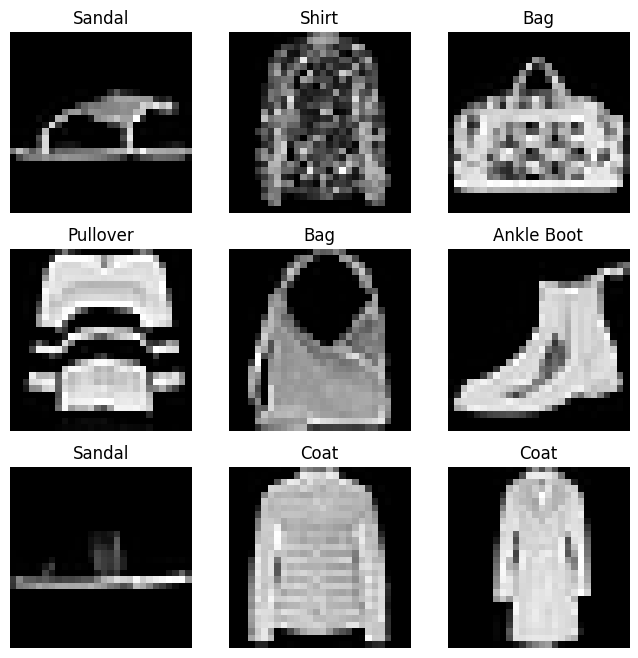

<Figure size 640x480 with 0 Axes>

In [ ]:
# Este es el conjunto de etiquetas (labels) del dataset FashionMNIST
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
# Creamos un figura de matplotlib
figure = plt.figure(figsize=(8, 8))
# Vamos a generar un imagen con una matriz de 3x3 imágenes
cols, rows = 3, 3
# Hacemos un iterador para obtener 9 imágenes de forma aleatorea
for i in range(1, cols * rows + 1):
  # Generamos un valor aleatoreo entre 0 y la longitud del dataset de train
  index = torch.randint(low=0, high=len(training_data), size=(1,)).item()
  # Obtenemos del dataset la imagen y el label
  img, label = training_data[index]
  # Agregamos la imagen a la figura en la posición i dentro de las 3 filas y 3 columnas
  figure.add_subplot(rows, cols, i)
  # Agregamos el título a la imagen
  plt.title(labels_map[label])
  # No mostramos las etiquetas del eje X/Y
  plt.axis("off")
  # La mostramos en la escala de grises, con el squeeze le estamos quitando una
  # dimensión al tensor. El tensor asociado a la imagen que se obtiene del
  # dataset tiene un shape de (1, 28, 28) y luego de aplicar el squeeze el shape
  # es (28, 28) que es el tamaño de las imágenes
  plt.imshow(img.squeeze(), cmap="gray")
# Ploteamos la imagen completa
plt.show()
# Limpiamos el plot
plt.clf()

### Creando un Dataset propio

Un dataset debe implementar 3 funciones: `__init__`, `__len__` y `__getitem__`.

El dataset FashionMNIST tiene los siguientes archivos:
- `t10k-images-idx3-ubyte`: Contiene las imágenes del dataset de test.
- `t10k-labels-idx1-ubyte`: Contiene las labels del dataset de test.
- `train-images-idx3-ubyte`: Contiene las imágenes del dataset de train.
- `train-labels-idx1-ubyte`: Contiene las labels del dataset de train.

Como podemos ver las imágenes se encuentran en un archivos y las labels en otro.

Esto deberían poder verlo en: `/content/data/FashionMNIST/raw`

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image
from typing import Callable, Tuple

# Creamos nuestra clase para trabajar con el dataset. Debemos extender de la
# clase torch.utils.data.Dataset
class CustomImageDataset(Dataset):
  def __init__(self,
               annotations_file: str,
               img_dir: str,
               transform: Callable|None=None,
               target_transform: Callable|None=None,
               ):
    """ Función que inicializa el objeto CustomImageDataset.

    Args:
      annotations_file (str): Nombre del archivo con las labels.
      img_dir (str): Nombre del directorio con las imágenes.
      transform (Callable|None): Función para transformar la imagen.
        Defaults to None.
      target_transform (Callable|None): Función para transformar el label.
        Defaults to None.
    """
    # Leemos las etiquetas del archivo
    self.img_labels = pd.read_csv(annotations_file)
    # Guardamos el directorio donde se encuentran las imágenes
    self.img_dir = img_dir
    # Guardamos la función de transformación de la imagen
    self.transform = transform
    # Guardamos la función de transformación del label
    self.target_transform = target_transform

  def __len__(self) -> int:
    """ Obtiene la longitud del Dataset.

    Returns:
      int: Retorna la longitud del Dataset.
    """
    # Leemos la longitud desde el diccionario de etiquetas
    return len(self.img_labels)

  def __getitem__(self, idx: int) -> Tuple[torch.Tensor, str]:
    """ Obtiene un item o data del Dataset.

    Args:
      idx (int): Contiene el valor del índice que deseo obtener.

    Returns:
      Tuple[torch.Tensor, str]: Retorna una tupla donde la primer posición
        es un Tensor con la imagen y la segunda posición es la etiqueta.
    """
    # Obtenemos el nombre de la imagen uniendo el directorio y el nombre de la
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    # Leemos la imagen
    image = read_image(img_path)
    # Obtengo el label correspondiente a la imagen
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      # Si existe la función de transformación de la imagen, la aplico
      image = self.transform(image)
    if self.target_transform:
      # Si existe la función de transformación del label, la aplico
      label = self.target_transform(label)
    return image, label

#### Descomprimiendo FashionMNIST

El dataset FashionMNIST esta comprimido con UByte. UByte es un tipo de datos entero sin signo de 8 bits, con valores comprendidos entre 0 y 255, ambos inclusive.

Vamos a ver su contenido.

Dentro del archivo `/content/openFashioMNIST/labels.csv` vamos a tener todas las labels y dentro de la carpeta `/content/openFashioMNIST/img/` vamos a tener todas las imágenes.

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image

# Archivo con imágenes
data_path = "/content/data/FashionMNIST/raw/train-images-idx3-ubyte"
# Archvio con las labels
labels_path = "/content/data/FashionMNIST/raw/train-labels-idx1-ubyte"

# Cargar imágenes
with open(data_path, 'rb') as f:
  fashionmnist_images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

# Cargar etiquetas
with open(labels_path, 'rb') as f:
  fashionmnist_labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)

# Directorio donde voy a almacenar los datos
folder_open_fashion_mnist = "/content/openFashioMNIST/"
os.makedirs(folder_open_fashion_mnist, exist_ok=True)
folder_open_fashion_mnist_img = "/content/openFashioMNIST/img/"
os.makedirs(folder_open_fashion_mnist_img, exist_ok=True)

# Guardo el csv con las labels
labels_df = pd.DataFrame(fashionmnist_labels, columns=["label"])
labels_df =labels_df.reset_index(names='filename')
labels_df['filename'] = labels_df['filename'].apply(lambda i: f"image_{i}.png")
labels_df.to_csv(f"{folder_open_fashion_mnist}labels.csv", index=False)

# Guardo las imágenes
for i, img in enumerate(fashionmnist_images):
    Image.fromarray(img).save(f"{folder_open_fashion_mnist_img}image_{i}.png")


#### Probando nuestro Dataset

Label id: 5 - Label: Sandal - Item position: 14716


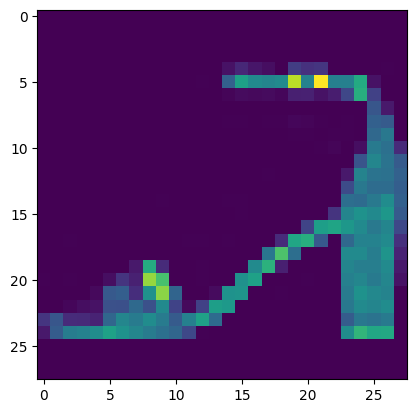

<Figure size 640x480 with 0 Axes>

In [ ]:
# Una vez que creamos el archivo de labels y tenemos las imágenes vamos a crear
# el objecto CustomImageDataset y ver que hace

# Creamos el objeto y le pasamos los parámetros, para esta prueba no es necesario
# transformarlo a un Tensor
custom_image_dataset = CustomImageDataset(
    # Archivo con las labels
    annotations_file=folder_open_fashion_mnist+"labels.csv",
    # Directorio donde se encuentran las imágenes
    img_dir=folder_open_fashion_mnist_img)
# Obtenemos una posición aleatorea
item_position = torch.randint(low=0, high=len(training_data), size=(1,)).item()
# Obtenemos la tupla de la posición, el __getitem__ devuelve la imagen y el label
img_cid, label_cid = custom_image_dataset.__getitem__(item_position)
# Mostramos los datos
print(f"Label id: {label_cid} - Label: {labels_map[label_cid]} - Item position: {item_position}")
# Mostramos la imagen
plt.imshow( img_cid.permute(1,2,0) )
# Mostramos la imagen
plt.show()
# Limpiamos el plot
plt.clf()

--------------




### Preparando los datos con el DataLoaders

El `Dataset` retorna 1 elemento por vez y para realizar un entrenamiento generalmente se necesitan mini-lotes (minibatches). Esto se debe a que se puede realizar con multiprocesamiento, también podríamos querer mesclar los elementos de un minibatch o realizar otros procesos, para todo esto es que tenemos los `DataLoders`.

In [ ]:
from torch.utils.data import DataLoader
# Creamos los DataLoades desde los dataset de training_data y test_data, a su
# vez le decimos que queremos minibatches de 64 elementos y que cada minibatch
# se mescle.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### Iterando el DataLoader

We have loaded that dataset into the ``DataLoader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over
the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).



Cantidad de imágenes: torch.Size([64, 1, 28, 28])
Cantidad de labels: torch.Size([64])
Label id: 6 - Label: Shirt - Item position: 8


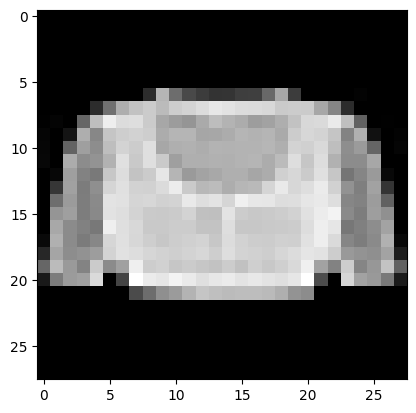

<Figure size 640x480 with 0 Axes>

In [ ]:
# Creamos un iterador del train_dataloader
dl_iterator = iter(train_dataloader)
# Pedimos el primer elemento del iterador
train_features, train_labels = next(dl_iterator)
# Mostramos la cantidad de imágenes y de labels
print(f"Cantidad de imágenes: {train_features.size()}")
print(f"Cantidad de labels: {train_labels.size()}")
# Obtenemos de un número aleatoreo entre 0 y 63
item_position = torch.randint(low=0, high=len(train_labels), size=(1,)).item()
img = train_features[item_position].squeeze()
label_id = train_labels[item_position].item()
# Muestro los datos
print(f"Label id: {label_id} - Label: {labels_map[label_id]} - Item position: {item_position}")
# Muestro la imagen
plt.imshow(img, cmap="gray")
plt.show()
# Limpiamos el plot
plt.clf()

## [Transformaciones](https://pytorch.org/vision/stable/transforms.html)

Los datos no siempre vienen en su forma procesada final que se requiere para
algoritmos de aprendizaje automático. Utilizamos **transformaciones** para realizar algunas manipulación de los datos y hacerlos adecuados para el entrenamiento.

Todos los conjuntos de datos de TorchVision tienen dos parámetros:

- `transform` para modificar las características
- `target_transform` para modificar las etiquetas.

Las características de FashionMNIST están en formato PIL Image y las etiquetas son números enteros.
Para el entrenamiento, necesitamos las características como tensores normalizados y las etiquetas como tensores codificados de un solo golpe.
Para realizar estas transformaciones, utilizamos `ToTensor` y `Lambda`.

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # ToTensor: convierte una imagen PIL o un arreglo de numpy en un FloatTensor
    # y escala los valores de intensidad de los píxeles de la imagen en el
    # rango [0., 1.]. Es decir, divide cada valor por el máximo número (255).
    transform=ToTensor(),
    # Lambda: las transformaciones lambda aplican cualquier función lambda
    # definida por el usuario. Aquí, definimos una función para convertir el
    # número entero en un tensor codificado de un punto. Primero se crea un
    # tensor de ceros con un tamaño de 10 posiciones (el número de etiquetas
    # en nuestro conjunto de datos) y llama a scatter_ que asigna un valor=1
    # en el índice dado por la etiqueta y.
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
# Mostramos como quedaría nuestro Dataset
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

## Construir una red neuronal

Las redes neuronales se componen de capas/módulos que realizan operaciones con los datos.

El espacio de nombres [torch.nn](https://pytorch.org/docs/stable/nn.html) proporciona todos los bloques de construcción que se necesitan para
construirla.

Una red neuronal es un módulo en sí, que consiste en una estructura anidada que permite construir y gestionar arquitecturas más complejas.

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Obteniendo los dispositivos disponibles

Es recomendable obtener el mejor dispositivo disponible para realizar un entrenamiento.

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
# Recuerden que en colab, desde el menú de (Runtime -> Change runtime type)
# podemos cambiar el tipo de procesasor que vamos a utilizar, por ejemplo:
# cpu o cuda o tpu
print(f"Utilizando el dispositiva {device}")

Utilizando el dispositiva cpu


### Definiendo una clase

Vamos a definir una red neuronal a partir de la clase `nn.Module` y vamos a definir en el método `__init__` la inicialización de la red y luego debemos escribir nuestro método de `forward`.



In [ ]:
# Definimos nuestro modelo
class NeuralNetwork(nn.Module):
  def __init__(self):
    """ Inicializamos la red. Esto quiere decir que vamos a crear todos los
        objetos que necesitaremos utilizar en nuestra red.
    """
    super().__init__()
    # Reduce las dimensiones de un tensor (vector listos para
    # trabajar en cpu/gpu)
    self.flatten = nn.Flatten()
    # Vamos a definir una secuencia de pasos que debe ejecutar nuestra red neuronal
    self.linear_relu_stack = nn.Sequential(
      # Esta capa como entrada un tensor de 28x28 (o 784 posiciones,
      # osea nuestra imagen) y la salida o predicción va a ser un tensor de
      # 512 posiciones
      nn.Linear(28*28, 512),
      # Es un capa que toma los siguientes valores max(0,x), es decir,
      # si el valor es menor a 0 entonces retorna 0, en caso contrario
      # retorna el valor.
      nn.ReLU(),
      nn.Linear(512, 512),
      nn.ReLU(),
      # Al final creamos otra transformación lineal que recibe un tensor con 512
      # posiciones y va a salir un tensor de 10 posiciones que son las etiquetas
      # o tipos de prendas del dataset FashionMNIST
      nn.Linear(512, 10)
    )

  def forward(self, x):
    """ Especificamos como se va a trabajar con los datos para entrenar el red neuronal

    Args:
      x (Tensor): Tensor con los valores de la imágen, en nuestro caso, recibimos
                    una matriz de 28*28.
    """
    # Realizamos el Flatten
    x_flatten = self.flatten(x)
    # Aplicamos la secuencia y obtenemos las probabilidades de que sea cada una
    # de las etiquetas o tipos de prendas del datasetFashionMNIST
    logits = self.linear_relu_stack(x_flatten)
    # Retornamos las probabilidades
    return logits

Vamos a instanciar la clase y la enviamos al dispositivo que cargamos en la variable `device`.

In [ ]:
# Instanciamos la clase y la enviamos al dispositvo
model = NeuralNetwork().to(device)
# Mostramos la red instanciada
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)



Para utilizar el modelo, le pasamos los datos de entrada. Esto ejecuta el forward del modelo, junto con algunas operaciones en segundo plano. **¡No invocar al método `forward` directamente!**

La salida del modelo es un tensor de 2 dimensiones:

- Dimensión 0: Es cada una de las probabilidades de las 10 categorías predecidas.
- Dimensión 1: Son los valores individuales de cada salida.

Obtenemos las probabilidades de predicción pasándolas a través de una instancia del módulo nn.Softmax.

In [ ]:
# Vamos a suponer es este tensor es una imagen porque tiene la dimensión de 28x28
image = torch.rand(1, 28, 28, device=device)
# Ejecutamos el modelo para obtener las predicciones
logits = model(image)
print(f"Las predicciones para cada categoría son: \n{logits}")
# Convertimos las predicciones en probabilidades aplicando el softmax
pred_probab = nn.Softmax(dim=1)(logits)
print(f"Las probabilidades para cada categoría son: \n{pred_probab}.")
print(f"La suma de las probabilidades debe ser 1 y es {pred_probab.sum()}.")
# Obtenemos la probabilidad más alta
y_pred = pred_probab.argmax(1).item()
print(f"La clase predecida tiene es el id {y_pred} y su nombre es {labels_map[y_pred]}")

Las predicciones para cada categoría son: 
tensor([[ 0.0049,  0.0006, -0.0108, -0.0233, -0.0133, -0.0319,  0.1148, -0.0690,
         -0.0180, -0.1200]], grad_fn=<AddmmBackward0>)
Las probabilidades para cada categoría son: 
tensor([[0.1020, 0.1016, 0.1004, 0.0992, 0.1002, 0.0983, 0.1139, 0.0947, 0.0997,
         0.0900]], grad_fn=<SoftmaxBackward0>).
La suma de las probabilidades debe ser 1 y es 0.9999998807907104.
La clase predecida tiene es el id 6 y su nombre es Shirt


--------------




### Capas del modelo

Desglosemos las capas del modelo FashionMNIST. Para ilustrarlo vamos a utilizar un minibatch de 3 imágenes con un tamaño de 28x28 y vamos a ver su paso por la red.



In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


#### [nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)

Esta función transforma un arreglo de 2 dimensiones (28x28) en un arreglo de 1 dimensión de (784). Está operación la realizamos sobre todo el minibatch.

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
# Como vimos anteriormente la variable input_image es el minibatch de 3 imágenes
# donde cada image es una matriz de 28x28
print(f"Luego de realizar el flatten obtenemos: {flat_image.size()}")
# Notar como ahora obtenermos un minibatch de 3 arreglos, donde cada arreglo
# tiene una dimensión de 784

Luego de realizar el flatten obtenemos: torch.Size([3, 784])


In [ ]:
# OTRO EJEMPLO!
# Creamos una matriz de 32x1x5x5
flatten_input = torch.randn(32, 1, 5, 5)
# Los parámetros por defecto son (start_dim=1, end_dim=-1), es decir,
# reduce las primeras 2 posiciones (32x1) y el resto (5x5)
flatten_class = nn.Flatten()
flatten_output = flatten_class(flatten_input)
print(f"Forma del tensor de entrada: {flatten_input.shape}")
print(f"Forma del tensor de salida (start_dim=1, end_dim=-1): {flatten_output.shape}")

# Los parámetros por defecto son (start_dim=0, end_dim=2), es decir,
# reduce las primeras 3 posiciones (32x1x5) y el resto (5)
flatten_class = nn.Flatten(0, 2)
flatten_output = flatten_class(flatten_input)
print(f"Forma del tensor de salida (start_dim=0, end_dim=2): {flatten_output.shape}")

Forma del tensor de entrada: torch.Size([32, 1, 5, 5])
Forma del tensor de salida (start_dim=1, end_dim=-1): torch.Size([32, 25])
Forma del tensor de salida (start_dim=0, end_dim=2): torch.Size([160, 5])


#### [nn.Linear](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

Es una transformación lineal que aplica la siguiente fórmula $$ y = xA^{T} + b $$
donde
- y: es la predicción
- x: es el tensor de entrada
- AT: es la matriz transpuesta de muestro modelo, es decir, los valores que se van a encontrar durante el entrenamiento
- b: es el bias o desplazamiento de valores

Esta capa recibe como entrada un tensor de 784 posiciones (nuestra imagen luego del flatten) y la salida o predicción va a ser un tensor de 20 posiciones.

In [ ]:
# Creamos la capa que recibe un tensor de 784 posiciones y sale un tensor de 20 posiciones
layer1 = nn.Linear(in_features=28*28, out_features=20)
# Ejecutamos la capa pasandole el minibatch de 3 imágenes y 784 posiciones cada imagen
hidden1 = layer1(flat_image)
print(f"La entrada tiene una dimensicón de {flat_image.size()}")
print(f"La salida de la capa Linear tiene una dimensicón de {hidden1.size()}")

La entrada tiene una dimensicón de torch.Size([3, 784])
La salida de la capa Linear tiene una dimensicón de torch.Size([3, 20])


#### [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

Las activaciones no lineales son las que crean los complejos mapeos entre las entradas y salidas del modelo.
Se aplican después de las transformaciones lineales para introducir *no linealidad*, lo que ayuda a las redes neuronales a aprender una gran variedad de fenómenos.

Es una transformación que toma los siguientes valores max(0,x), es decir, si el valor es menor a 0 entonces retorna 0, en caso contrario retorna el valor.

In [ ]:
print(f"Valores antes de aplicar la ReLU: \n{hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"Valores después de aplicar la ReLU: \n{hidden1}")

Valores antes de aplicar la ReLU: 
tensor([[-0.0906,  0.0314, -0.1248, -0.0869, -0.1281, -0.3854,  0.3978, -0.4367,
         -0.0907,  0.1029,  0.2337, -0.5719,  0.3444, -0.1843,  0.2908,  0.2602,
         -0.1810, -0.4085,  0.0787, -0.0944],
        [ 0.0273, -0.0640, -0.2188, -0.1922, -0.2158, -0.4362,  0.6289, -0.2477,
         -0.2545, -0.0326, -0.1312, -0.3359,  0.7732, -0.2212,  0.1752,  0.5820,
         -0.2240, -0.1122,  0.0478, -0.4133],
        [ 0.0057, -0.0135, -0.1162, -0.1190, -0.5354, -0.2973,  0.6441, -0.6069,
         -0.1894,  0.0210, -0.2190, -0.4038,  0.8101, -0.1050, -0.0269,  0.4775,
         -0.0249, -0.0726, -0.1791, -0.5374]], grad_fn=<AddmmBackward0>)


Valores después de aplicar la ReLU: 
tensor([[0.0000, 0.0314, 0.0000, 0.0000, 0.0000, 0.0000, 0.3978, 0.0000, 0.0000,
         0.1029, 0.2337, 0.0000, 0.3444, 0.0000, 0.2908, 0.2602, 0.0000, 0.0000,
         0.0787, 0.0000],
        [0.0273, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6289, 0.0000, 0.0000,
      

#### [nn.Secuencial](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

Es un contenedor ordenado de módulos. Los datos pasan por todos los módulos en el mismo orden definido.

In [ ]:
# Armamos una secuencia con el flatten, la capa Lineal, la ReLU y al final otra
# Lineal.
# Notar que la salida de la última capa es 10, que son la cantidad de categorías
# de la clasificaciones
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
# Creamos un minibatch de 3 imágenes de 28x28
input_image = torch.rand(3, 28, 28)
print(f"El minibatch es: \n{input_image}")
logits = seq_modules(input_image)
print(f"La salida del modelo es: \n{logits}")

El minibatch es: 
tensor([[[0.5748, 0.0848, 0.6981,  ..., 0.5834, 0.7279, 0.3681],
         [0.9192, 0.8793, 0.1583,  ..., 0.3390, 0.7610, 0.8870],
         [0.4701, 0.5137, 0.4876,  ..., 0.8089, 0.6941, 0.2657],
         ...,
         [0.0868, 0.6799, 0.2861,  ..., 0.2333, 0.7940, 0.1059],
         [0.7598, 0.9182, 0.5570,  ..., 0.5808, 0.8625, 0.2898],
         [0.6420, 0.2021, 0.3851,  ..., 0.2290, 0.1591, 0.3240]],

        [[0.7934, 0.0024, 0.1143,  ..., 0.6989, 0.4962, 0.9285],
         [0.9061, 0.8068, 0.8460,  ..., 0.8492, 0.8636, 0.5142],
         [0.0661, 0.9183, 0.6491,  ..., 0.7193, 0.7970, 0.3466],
         ...,
         [0.8114, 0.2748, 0.6324,  ..., 0.3802, 0.5802, 0.6816],
         [0.9592, 0.7632, 0.0398,  ..., 0.9245, 0.7259, 0.0354],
         [0.1973, 0.7913, 0.7403,  ..., 0.2239, 0.1916, 0.7018]],

        [[0.5553, 0.5157, 0.9992,  ..., 0.6721, 0.5787, 0.1538],
         [0.9113, 0.4142, 0.5901,  ..., 0.4028, 0.7633, 0.7676],
         [0.0796, 0.2653, 0.8153,  ..., 

#### [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)

La última capa lineal de la red neuronal devuelve `logits` - valores brutos que se pueden encontrar entre [-\infty, \infty].

Los `logits` se escalan a valores [0, 1] que representan las probabilidades predichas del modelo para cada clase. El parámetro `dim` indica la dimensión a lo largo de la cual los valores deben sumar 1.

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(f"El logits de entrada es: \n{logits}")
print(f"Luego de aplicar el softmax obtengo: \n{pred_probab}")

El logits de entrada es: 
tensor([[-0.2005,  0.0687, -0.1927, -0.2971,  0.0729,  0.0156, -0.3188,  0.2122,
          0.4279,  0.1549],
        [-0.2862,  0.1235, -0.2599, -0.2131, -0.1347,  0.0255, -0.1720,  0.1819,
          0.3426,  0.0588],
        [-0.2220,  0.1735, -0.1609, -0.3342,  0.0180,  0.0648, -0.1292,  0.2319,
          0.2137,  0.0772]], grad_fn=<AddmmBackward0>)
Luego de aplicar el softmax obtengo: 
tensor([[0.0801, 0.1049, 0.0808, 0.0727, 0.1053, 0.0994, 0.0712, 0.1211, 0.1502,
         0.1143],
        [0.0761, 0.1146, 0.0781, 0.0819, 0.0885, 0.1039, 0.0853, 0.1215, 0.1427,
         0.1074],
        [0.0793, 0.1178, 0.0843, 0.0709, 0.1008, 0.1056, 0.0870, 0.1248, 0.1226,
         0.1069]], grad_fn=<SoftmaxBackward0>)


### Parámetros del modelo

Muchas capas de una red neuronal están parametrizadas, es decir, tienen pesos y sesgos asociados que se optimizan durante el entrenamiento. Al heredad de la calse nn.Module, se rastrean de forma automática todos los campos definidos y se hacen accesibles todos los parámetros usando los métodos `parameters()` o `named_parameters()`.

En este ejemplo, vamos a iterar sobre cada parámetro e imprimimos su tamaño y sus valores.

In [ ]:
print(f"Estructura del model: \n{model}\n\n")

for name, param in model.named_parameters():
    print(f"Nombre de la capa: {name} | Tamaño: {param.size()} | Valores : {param[:2]} \n")

Estructura del model: 
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Nombre de la capa: linear_relu_stack.0.weight | Tamaño: torch.Size([512, 784]) | Valores : tensor([[-0.0022,  0.0094, -0.0207,  ..., -0.0331, -0.0042, -0.0336],
        [ 0.0215,  0.0025, -0.0101,  ...,  0.0216, -0.0226, -0.0175]],
       grad_fn=<SliceBackward0>) 

Nombre de la capa: linear_relu_stack.0.bias | Tamaño: torch.Size([512]) | Valores : tensor([-0.0045, -0.0169], grad_fn=<SliceBackward0>) 

Nombre de la capa: linear_relu_stack.2.weight | Tamaño: torch.Size([512, 512]) | Valores : tensor([[-0.0073,  0.0287,  0.0401,  ..., -0.0318,  0.0375, -0.0229],
        [ 0.0063,  0.0441,  0.0008,  ..., -0.0061,  0.0049,  0.0438]],
       grad_fn=<Sl

## Diferenciación automática con torch.autograd

A la hora de entrenar redes neuronales, el algoritmo más utilizado es la **back propagation**. En este algoritmo, los parámetros (pesos del modelo) se ajustan según el **gradiente** de la función de pérdida con respecto al parámetro dado.

Para calcular esos gradientes, PyTorch tiene incorporado un motor de diferenciación llamado `torch.autograd`. Soporta el cálculo automático del gradiente para cualquier gráfico computacional.

Consideremos la red neuronal de una capa más simple, con entrada x, parámetros w y b, y alguna función de pérdida. Se puede definir en PyTorch de la siguiente manera:


In [ ]:
import torch

# Valores de entrada al modelo
x = torch.ones(5)
# Valores que esperemos sean predecidos
y = torch.zeros(3)
# Parámetros del modelo
w = torch.randn(5, 3, requires_grad=True)
# Desplazamiento del modelo
b = torch.randn(3, requires_grad=True)
# Esta es la capa Linear
z = torch.matmul(x, w)+b
# Cálculo del loss, es decir, cual es la diferencia entre lo que predijo el
# modelo (z) y lo que debería haber predecido (y)
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
print(f"La diferencia entre vectores es: {loss}")

La diferencia entre vectores es: 1.2297958135604858


### Tensores, funciones y grafo computacional
Este código define el siguiente grafo computacional:

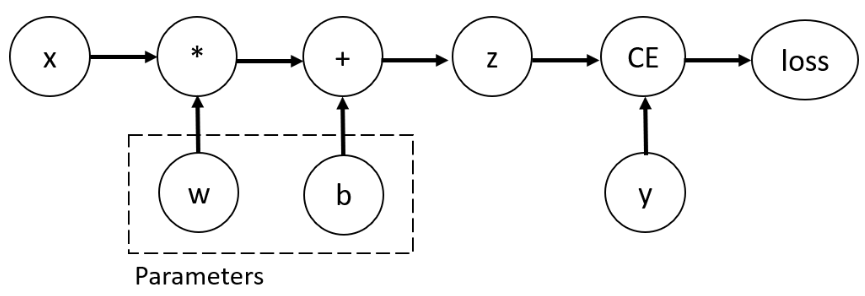

En este grafo, w y b son parámetros que necesitamos optimizar. Por lo tanto, tenemos que ser capaces de calcular los gradientes de la función de pérdida con respecto a esas variables. Para ello, establecemos la propiedad requires_grad de esos tensores.

Nota
Puedes establecer el valor de `requires_grad` cuando creas un tensor, o más tarde usando el método `x.requires_grad_(True)`.

Una función que aplicamos a los tensores para construir el grafo computacional es de hecho un objeto de la clase Function. Este objeto sabe cómo calcular la función en la dirección hacia adelante, y también cómo calcular su derivada durante el paso de propagación hacia atrás. Una referencia a la función de propagación hacia atrás se almacena en la propiedad grad\_fn de un tensor. Puede encontrar más información de función en la [documentación](https://pytorch.org/docs/stable/autograd.html#function).



In [ ]:
print(f"Gradiente para z = {z.grad_fn}")
print(f"Gradiente para el loss = {loss.grad_fn}")

Gradiente para z = <AddBackward0 object at 0x7fef78975b10>
Gradiente para el loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7fef78975b70>


### Cálculo de las derivadas o gradientes

Para optimizar los pesos de los parámetros en la red neuronal, necesitamos calcular las derivadas de nuestra función de loss con respecto a los parámetros, es decir, necesitamos $\frac{\partial loss}{\partial w}$ y $\frac{\partial loss}{\partial b}$ bajo algunos valores fijos de x e y. Para calcular esas derivadas, llamamos a loss.backward(), y luego recuperamos los valores de w.grad y b.grad:


In [ ]:
loss.backward()
print(f"Gradiente del parámetro w: \n{w.grad}")
print(f"Gradiente del bias b: \n{b.grad}")

Gradiente del parámetro w: 
tensor([[0.3184, 0.0168, 0.1379],
        [0.3184, 0.0168, 0.1379],
        [0.3184, 0.0168, 0.1379],
        [0.3184, 0.0168, 0.1379],
        [0.3184, 0.0168, 0.1379]])
Gradiente del bias b: 
tensor([0.3184, 0.0168, 0.1379])


Notar que:

- Sólo podemos obtener las propiedades `grad` para los nodos hoja del grafo computacional, que tienen la propiedad `requires_grad` establecida a `True`. Para el resto de nodos de nuestro grafo, los gradientes no estarán disponibles.
- Por razones de rendimiento, sólo podemos realizar cálculos de gradiente utilizando `backward` una vez en un gráfico dado. Si necesitamos hacer varias llamadas `backward` en el mismo gráfico, tenemos que pasar `retain_graph=True` a la llamada `backward` porque sino los valores se pierden.

### Desactivación del seguimiento del gradiente

Por defecto, todos los tensores con requires_grad=True rastrean su historia computacional y soportan el cálculo del gradiente. Sin embargo, hay algunos casos en los que no necesitamos hacerlo, por ejemplo, cuando hemos entrenado el modelo y sólo queremos aplicarlo a algunos datos de entrada, es decir, sólo queremos hacer cálculos hacia adelante a través de la red. Podemos detener los cálculos de seguimiento rodeando nuestro código de cálculo con el bloque torch.no_grad():




In [ ]:
z = torch.matmul(x, w)+b
print(f"El tensor z requiere gradiente: {z.requires_grad}")

with torch.no_grad():
  print("\tEstamos dentro de torch.no_grad")
  z = torch.matmul(x, w)+b
  print(f"\tEl tensor z NO requiere gradiente: {z.requires_grad}")
print("Estamos fuera de torch.no_grad")
# Mantiene el estado de la última asignación del tensor
print(f"El tensor z requiere gradiente: {z.requires_grad}")

El tensor z requiere gradiente: True
	Estamos dentro de torch.no_grad
	El tensor z NO requiere gradiente: False
Estamos fuera de torch.no_grad
El tensor z requiere gradiente: False


Otra forma para obtener el mismo resultado es con el método `detach()`:

In [ ]:
z = torch.matmul(x, w)+b
print("Llamamos el método detach")
z_det = z.detach()
print(f"El tensor z_det requiere gradiente: {z_det.requires_grad}")

Llamamos el método detach
El tensor z_det requiere gradiente: False


Hay razones por las que puede querer desactivar el seguimiento de gradiente, esto se utiliza para realizar predicciones:

- Para marcar algunos parámetros en su red neuronal como parámetros congelados.
- Para acelerar los cálculos cuando sólo está haciendo el paso hacia adelante, porque los cálculos en tensores que no siguen gradientes serían más eficientes.

### Más sobre grafos computacionales

Conceptualmente, autograd mantiene un registro de datos (tensores) y todas las operaciones ejecutadas (junto con los nuevos tensores resultantes) en un grafo acíclico dirigido (DAG) formado por objetos Function\_. En este DAG, las hojas son los tensores de entrada, las raíces son los tensores de salida. Trazando este grafo desde las raíces a las hojas, puede calcular automáticamente los gradientes usando la regla de la cadena.

En una pasada hacia adelante (fordward), autograd hace dos cosas simultáneamente:

- Ejecutar la operación solicitada para calcular un tensor resultante
- Mantener la función gradiente de la operación en el DAG

El paso hacia atrás (backward) comienza cuando se llama a `.backward()` en la raíz del DAG.``autograd` entonces:

- Calcula los gradientes de cada `.grad_fn`
- Los acumula en el atributo `.grad` del tensor respectivo
- Usando la regla de la cadena, se propaga hasta los tensores de las hojas.

Nota
**Los DAGs son dinámicos en PyTorch** Algo importante a tener en cuenta es que el grafo se recrea desde cero; después de cada llamada a `.backward()`, autograd comienza a poblar un nuevo grafo. Esto es exactamente lo que te permite usar sentencias de flujo de control en tu modelo; puedes cambiar la forma, el tamaño y las operaciones en cada iteración si es necesario.

### Lectura opcional: Gradientes Tensoriales y Productos Jacobianos

En muchos casos, tenemos una función de pérdida escalar, y necesitamos calcular el gradiente con respecto a algunos parámetros. Sin embargo, hay casos en los que la función de salida es un tensor arbitrario. En este caso, PyTorch le permite calcular el llamado producto Jacobiano, y no el gradiente real.

Para una función vectorial $\vec{y}=f(\vec{x})$ , $\vec{x}=\langle x_1,\dots,x_n\rangle$ y $\vec{y}=\langle y_1,\dots,y_m\rangle$, un gradiente de $\vec{y}$ con respecto a $\vec{x}$ viene dado por la matriz Jacobiana:

\begin{align}J=\left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\end{align}


En lugar de calcular la matriz jacobiana propiamente dicha, PyTorch permite calcular el producto jacobiano $v^T\cdot J$ para un vector de entrada dado $v=(v_1 \dots v_m)$. Esto se consigue llamando hacia atrás con $v$ como argumento. El tamaño de $v$ debe ser el mismo que el tamaño del tensor original, con respecto al cual queremos calcular el producto:

In [ ]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"Primera llamada: \n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print()
print(f"Segunda llamada: \n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print()
print(f"Llamada después de poner a cero los gradientes: \n{inp.grad}")

Primera llamada: 
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Segunda llamada: 
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Llamada después de poner a cero los gradientes: 
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


Observa que cuando llamamos backward por segunda vez con el mismo argumento, el valor del gradiente es diferente. Esto ocurre porque al hacer la propagación hacia atrás, PyTorch acumula los gradientes, es decir, el valor de los gradientes calculados se añade a la propiedad grad de todos los nodos hoja del gráfico computacional. Si quieres calcular los gradientes apropiados, necesitas poner a cero la propiedad grad antes. En la vida real, un optimizador nos ayuda a hacerlo.

Nota
Anteriormente estábamos llamando a la función `backward()` sin parámetros. Esto es esencialmente equivalente a llamar a `backward(torch.tensor(1.0))`, que es una forma útil de calcular los gradientes en el caso de una función de valor escalar, como la pérdida durante el entrenamiento de redes neuronales.



## Optimizando los parámetros

Ahora que tenemos un modelo y los datos, es el momento de entrenar, validar y probar nuestro modelo mediante la optimización de sus parámetros en
los datos. El entrenamiento de un modelo es un proceso iterativo; en cada iteración el modelo hace una suposición sobre la salida, calcula
el error en su suposición (*loss*), recoge las derivadas del error con respecto a sus parámetros (como vimos en la sección anterior), y **optimiza** estos parámetros utilizando el gradiente descendente. Para un mayor detalle ver este vídeo sobre [retropropagación de 3Blue1Brown](https://www.youtube.com/watch?v=tIeHLnjs5U8).


Ahora vamos a utilizar el modelo y los databaset que creamos anteriormente durante el colab. Necesitamos tener cargadas las variables:

- training_data
- test_data
- train_dataloader
- test_dataloader
- NeuralNetwork
- model


### Hiperparámetros

Los hiperparámetros son parámetros ajustables que permiten controlar el proceso de optimización del modelo. Diferentes valores de los hiperparámetros pueden afectar al entrenamiento del modelo y a las tasas de convergencia.

Definimos los siguientes hiperparámetros para el entrenamiento:

- Número de épocas: el número de veces que se itera sobre el conjunto de datos.
- Tamaño del lote: número de muestras de datos que se propagan por la red antes de que se actualicen los parámetros.
- Tasa de aprendizaje: cuánto se actualizan los parámetros del modelo en cada lote/época. Los valores pequeños producen una velocidad de aprendizaje lenta, mientras que los valores grandes pueden dar lugar a un comportamiento impredecible durante el entrenamiento.

In [ ]:
# tasa de aprendisaje
learning_rate = 1e-2
# tamaño del lote
batch_size = 64
# número de epocas
epochs = 10

### Bucle de optimización

Una vez establecidos los hiperparámetros, podemos entrenar y optimizar nuestro modelo con un bucle de optimización. Cada iteración del bucle de optimización se denomina época.

Cada época consta de dos partes principales:

- El bucle de entrenamiento: itera sobre el conjunto de datos de entrenamiento e intenta converger a los parámetros óptimos.
- El bucle de validación/prueba: itera sobre el conjunto de datos de prueba para comprobar si mejora el rendimiento del modelo.

Familiaricémonos brevemente con algunos de los conceptos utilizados en el bucle de entrenamiento. Avancemos para ver la etiqueta completa del bucle de optimización.

#### Función de pérdida

Cuando se le presentan algunos datos de entrenamiento, es probable que nuestra red no entrenada no dé la respuesta correcta. La función de pérdida mide el grado de disimilitud del resultado obtenido con el valor objetivo, y es la función de pérdida que queremos minimizar durante el entrenamiento. Para calcular la pérdida, hacemos una predicción utilizando las entradas de nuestra muestra de datos dada y la comparamos con el valor verdadero de la etiqueta de datos.

Las funciones de pérdida más comunes son nn.MSELoss (Error cuadrático medio) para tareas de regresión, y nn.NLLLoss (Probabilidad logarítmica negativa) para clasificación. nn.CrossEntropyLoss combina nn.LogSoftmax y nn.NLLLoss.

Pasamos los logits de salida de nuestro modelo a nn.CrossEntropyLoss, que normalizará los logits y calculará el error de predicción.

In [ ]:
# Inicializamos la función de loss
loss_fn = nn.CrossEntropyLoss()

#### [Optimizador](https://pytorch.org/docs/stable/optim.html)

La optimización es el proceso de ajuste de los parámetros del modelo para reducir el error del mismo en cada paso de entrenamiento. Los algoritmos de optimización definen cómo se realiza este proceso (en este ejemplo utilizamos el Gradiente Descendente Estocástico). Toda la lógica de optimización está encapsulada en el objeto optimizador. Aquí, usamos el optimizador SGD; adicionalmente, hay muchos optimizadores diferentes disponibles en PyTorch como ADAM y RMSProp, que funcionan mejor para diferentes tipos de modelos y datos.

Inicializamos el optimizador registrando los parámetros del modelo que necesitan ser entrenados, y pasando el hiperparámetro de la tasa de aprendizaje.

In [ ]:
# Inicializamos el optimizador
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Dentro del bucle de entrenamiento, la optimización se realiza en tres pasos:

- Llame a optimizer.zero_grad() para restablecer los gradientes de los parámetros del modelo. Los gradientes se suman por defecto; para evitar la doble contabilidad, los ponemos a cero explícitamente en cada iteración.
- Retropropague la pérdida de predicción (Backpropagate) con una llamada a loss.backward(). PyTorch deposita los gradientes de la pérdida con respecto a cada parámetro.
- Una vez que tenemos nuestros gradientes, llamamos a optimizer.step() para ajustar los parámetros por los gradientes recogidos en el paso hacia atrás.


### Implementación



In [ ]:
# Bucle de entrenamiento
def train_loop(dataloader: DataLoader,
               model: NeuralNetwork,
               loss_fn: nn.CrossEntropyLoss,
               optimizer: torch.optim.SGD):
  """ Bucle de entrenamiento

  Args:
    dataloader (DataLoader): Dataloader
    model (NeuralNetwork): Modelo
    loss_fn (nn.CrossEntropyLoss): Función de loss
    optimizer (torch.optim.SGD): Optimizador
  """
  # Tamaño del dataset
  size = len(dataloader.dataset)
  # Iterador sobre los batch
  for batch, (X, y) in enumerate(dataloader):
    # Pasamos los tensores a un device
    X = X.to(device)
    y = y.to(device)
    # Calculo de la predicción
    pred = model(X)
    pred.to(device)
    # Calculo el loss
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    # Hago la optimización del paso
    optimizer.step()
    # Reestablesco los gradientes a 0
    optimizer.zero_grad()

    if batch % 100 == 0:
      # Si el batch es múltiplo de 100 muestro los datos
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Bucle para testear
def test_loop(dataloader: DataLoader,
              model: NeuralNetwork,
              loss_fn: nn.CrossEntropyLoss):
  """ Bucle de entrenamiento

  Args:
    dataloader (DataLoader): Dataloader
    model (NeuralNetwork): Modelo
    loss_fn (nn.CrossEntropyLoss): Función de loss
  """
  # Tamaño del dataset
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0
  # Desactivo los gradientes
  with torch.no_grad():
    # Itero el dataloader
    for X, y in dataloader:
      # Pasamos los tensores a un device
      X = X.to(device)
      y = y.to(device)
      # Realizó la predicción
      pred = model(X)
      # Calculo el loss
      test_loss += loss_fn(pred, y).item()
      # Calculo cuantas predicciones son correctas
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  # Divido el loss por la cantidad de batchs, esto me da el loss promedio de
  # los batchs
  test_loss /= num_batches
  # Divido los correctos por la cantidad de imágenes, lo que me da el porcentaje
  # de predicciones correctas
  correct /= size
  print(f"Errores en Test: \n\tAccuracy: {(100*correct):>0.1f}% \n\tAvg loss: {test_loss:>8f} \n")

We initialize the loss function and optimizer, and pass it to ``train_loop`` and ``test_loop``.
Feel free to increase the number of epochs to track the model's improving performance.



In [ ]:

epochs = 10
# Comienzo las iteraciones
for t in range(epochs):
    print(f"Epoca {t+1}")
    print("-"*80)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    print()

    test_loop(test_dataloader, model, loss_fn)
print("Fin!")

Epoca 1
--------------------------------------------------------------------------------
loss: 2.306683  [   64/60000]
loss: 2.131605  [ 6464/60000]
loss: 1.860498  [12864/60000]
loss: 1.483408  [19264/60000]
loss: 1.222188  [25664/60000]
loss: 1.156639  [32064/60000]
loss: 0.928095  [38464/60000]
loss: 0.777996  [44864/60000]
loss: 0.883423  [51264/60000]
loss: 0.705126  [57664/60000]

Errores en Test: 
	Accuracy: 69.8% 
	Avg loss: 0.785220 

Epoca 2
--------------------------------------------------------------------------------
loss: 0.760998  [   64/60000]
loss: 0.683795  [ 6464/60000]
loss: 0.744167  [12864/60000]
loss: 0.718067  [19264/60000]
loss: 0.724474  [25664/60000]
loss: 0.679763  [32064/60000]
loss: 0.635110  [38464/60000]
loss: 0.522660  [44864/60000]
loss: 0.981813  [51264/60000]
loss: 0.631689  [57664/60000]

Errores en Test: 
	Accuracy: 77.7% 
	Avg loss: 0.622133 

Epoca 3
--------------------------------------------------------------------------------
loss: 0.758638 

# Guardando y levantando el modelo

In [ ]:
import torch
import torchvision.models as models

## Saving and Loading Model Weights
PyTorch models store the learned parameters in an internal
state dictionary, called ``state_dict``. These can be persisted via the ``torch.save``
method:



In [ ]:
# model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_FashionMNIST.pth')

To load model weights, you need to create an instance of the same model first, and then load the parameters
using ``load_state_dict()`` method.



<div class="alert alert-info"><h4>Note</h4><p>be sure to call ``model.eval()`` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.</p></div>



### Guardando y levantando los pesos del modelo


In [ ]:
# El método state_dict me retorna los pesos o parámetros que calculo el modelo
# durante el entrenamiento
torch.save(model.state_dict(), 'model_FashionMNIST_weights.pth')

In [ ]:
# Si guardamos los pesos, entonces debemos instanciar el modelo para poder
# utilizar los pesos
model = NeuralNetwork()
model.load_state_dict(torch.load('model_FashionMNIST_weights.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

### Guardando y levantando el modelo completo


In [ ]:
# Guardamos el modelo completo, con sus capas
torch.save(model, 'model_FashionMNIST.pth')

In [ ]:
# Levantamos el modelo completo
model = torch.load('model_FashionMNIST.pth')
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)